In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction

The overall goal in machine learning is to obtain a model/hypothesis that **generalises well to new, unseen data**. With that aim, we must evaluate whether a model generalises well to unseen data. For that, we will typically use an independent test set. Some of the evaluation metrics we can use to measure the performance on a test set are the prediction accuracy and misclassification error in the context of classification models: we say that a good model has a “high generalisation accuracy” or “low generalisation error” (or, simply “good generalisation performance”).

In this lecture, we discuss some of the basic terms and machine learning fundamentals that are relevant for model evaluation, namely, **bias** and **variance**, and **overfitting and underfitting**. Importantly, we will analyse how they will help us evaluate how well a model generalises.

To introduce these concepts, we will start from a case study: how to improve a linear regression model.


# 1. Improving linear regression models: moving beyond linearity

Linear models are relatively simple to describe and implement, and have advantages over other approaches in terms of interpretation and inference. However, standard linear regression can have significant limitations in terms of predictive power. This is because the linearity assumption is almost always an approximation, and sometimes a poor one.

<ins>How can we improve linear regression models?</ins> We can relax the linearity assumption while still attempting to maintain as much interpretability as possible. We can do this by examining very simple extensions of linear models, like polynomial regression and step functions, as well as more sophisticated approaches such as splines, local regression, and generalised additive models.

Next, we will focus on improving linear regression through polynomial regression.

## 1.1 Creating polynomial features

Creating polynomials from features in a linear regression can be beneficial in certain situations to capture nonlinear relationships between the features and the target variable. Here are a few reasons why polynomial features might be useful in linear regression:

* **Nonlinear Relationships:** Linear regression assumes a linear relationship between the features and the target variable. However, in real-world scenarios, the relationship might not be strictly linear. By introducing polynomial features (e.g., squaring or cubing the original features), we can model and capture nonlinear patterns in the data more effectively.

* **Flexibility:** Polynomial features provide more flexibility in representing complex relationships. By including higher-order terms in the regression model, we allow the model **to fit curves, bends, and more intricate patterns in the data**.

* **Improved Model Fit:** In cases where a linear relationship alone does not adequately capture the underlying structure of the data, incorporating polynomial features can improve the model's fit. This can lead to better predictions and reduced errors.

* **Interaction Effects:** Polynomial features can also help capture interaction effects between different features. For example, including interaction terms like $x1 \cdot x2$ (where x1 and x2 are different features) allows the model to capture the combined effect of these features on the target variable.

It is important to note that **adding polynomial features can increase the complexity of the model and potentially introduce overfitting**, as we will show below. For now, for simplicity, the following examples, until section 1.2, will not split the dataset into training and test. Our purpose is to show how to create polynomial features and how using polynomial features leads to a better model with less error.

Linear Regression:
MSE: 82.41544851828525
Formula: y = 0.07 * X + 7.98


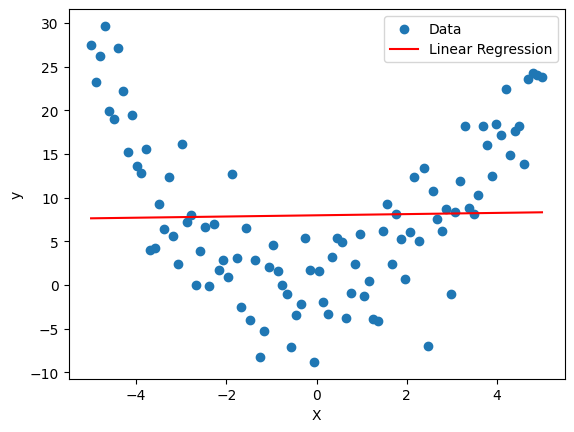

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generate the dataset
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = X ** 2 + np.random.normal(0, 5, size=(100, 1))

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)
y_linear_pred = linear_model.predict(X)
linear_mse = mean_squared_error(y, y_linear_pred)
linear_formula = f"y = {linear_model.coef_[0][0]:.2f} * X + {linear_model.intercept_[0]:.2f}"

# Print MSE values and regression formulas
print("Linear Regression:")
print("MSE:", linear_mse)
print("Formula:", linear_formula)


# Plot the results
plt.scatter(X, y, label="Data")
plt.plot(X, y_linear_pred, color='red', label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Fitting a linear regression model with polynomial features

Polynomial regression extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power.
For example, a cubic regression uses three variables, $X, X^2$, and $X^3$, as predictors. This approach provides a simple way to provide a non-linear fit to data. Steps to train a linear regression model with polynomial features:

1. *Transform the original dataset into a new dataset that includes polynomial terms.* For instance, say that we want to consider polynomial features up to degree 2 (quadratic). Then, if the input is $X = [2, 3]$, when transformed it becomes  $[[1, 2, 4], [1, 3, 9]$. We transform each $x$ value into  $[1, x, x^2]$.
2. *Create and fit a standard linear regression model on the new (feature-expanded) dataset*. In our example, notice that even though it’s "linear regression," it can now model quadratic (curved) relationships because of the polynomial features.



Linear Regression:
MSE: 82.41544851828525
Formula: y = 0.07 * X + 7.98

Polynomial Regression:
MSE: 20.294967188679134
Formula: y = 1.04 * X^2 + 0.07 * X + -0.83


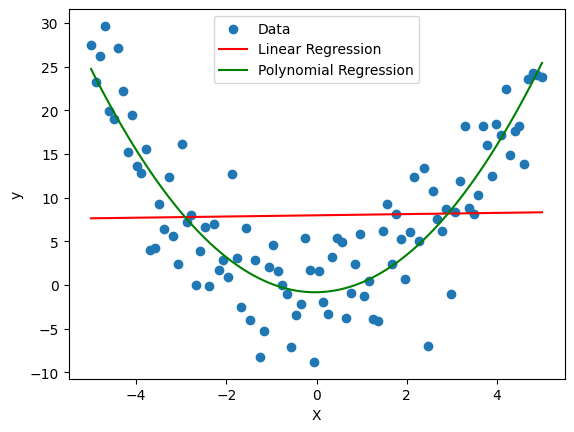

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generate the dataset
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = X ** 2 + np.random.normal(0, 5, size=(100, 1))

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)
y_linear_pred = linear_model.predict(X)
linear_mse = mean_squared_error(y, y_linear_pred)
linear_formula = f"y = {linear_model.coef_[0][0]:.2f} * X + {linear_model.intercept_[0]:.2f}"

# Fit a polynomial regression model
# Create a transformer that expands your original feature(s) into polynomial features up to degree 2 (quadratic).
poly_features = PolynomialFeatures(degree=2)
# Apply the transformation to X, so that now the dataset includes the polynomial terms.
X_poly = poly_features.fit_transform(X)
# A standard linear regression model is created and fit on the expanded feature set.
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
# Makes predictions using the trained polynomial regression model.
y_poly_pred = poly_model.predict(X_poly)
# Computes the mean squared error (MSE) between the actual target values y and the predictions y_poly_pred.
poly_mse = mean_squared_error(y, y_poly_pred)
# Extracts the learned coefficients from the model and formats them into a human-readable formula for the quadratic equation
poly_formula = f"y = {poly_model.coef_[0][2]:.2f} * X^2 + {poly_model.coef_[0][1]:.2f} * X + {poly_model.intercept_[0]:.2f}"

# Print MSE values and regression formulas
print("Linear Regression:")
print("MSE:", linear_mse)
print("Formula:", linear_formula)
print()
print("Polynomial Regression:")
print("MSE:", poly_mse)
print("Formula:", poly_formula)

# Plot the results
plt.scatter(X, y, label="Data")
plt.plot(X, y_linear_pred, color='red', label="Linear Regression")
plt.plot(X, y_poly_pred, color='green', label="Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Linear Regression:
MSE: 4569.3
Formula: y = 42.63 * X + 19.61

Polynomial Regression :
MSE: 3848.6
Formula: y = 9.09 * X^2 + 42.63 * X + -10.51

Polynomial Regression (degree=4):
MSE: 212.2
Formula: y = 0.82 * X^4 + 12.83 * X^3  + 2.18 * X^2  + -33.68 * X + -3.73


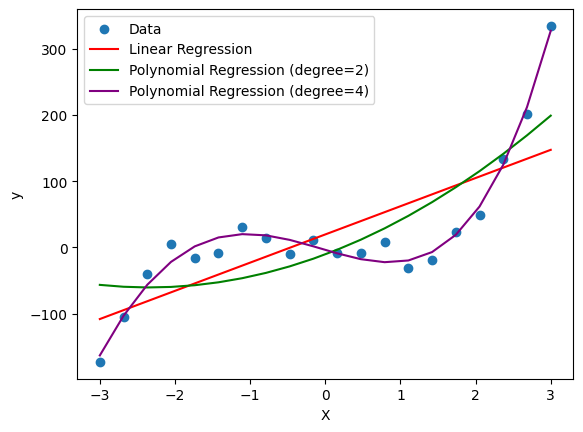

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generate the dataset
X = np.linspace(-3, 3, 20).reshape(-1, 1)
y = X ** 5 + X ** 4 + X ** 3 + X ** 2 + X + np.random.normal(0,20, size=(20, 1))

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)
y_linear_pred = linear_model.predict(X)
linear_mse = mean_squared_error(y, y_linear_pred)
linear_formula = f"y = {linear_model.coef_[0][0]:.2f} * X + {linear_model.intercept_[0]:.2f}"

# Fit a quadratic regression model
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)
poly_mse = mean_squared_error(y, y_poly_pred)
poly_formula = f"y = {poly_model.coef_[0][2]:.2f} * X^2 + {poly_model.coef_[0][1]:.2f} * X + {poly_model.intercept_[0]:.2f}"

# Fit a polynomial regression model
poly_features4 = PolynomialFeatures(degree=4)
X_poly4 = poly_features4.fit_transform(X)
poly_model4 = LinearRegression()
poly_model4.fit(X_poly4, y)
y_poly_pred4 = poly_model4.predict(X_poly4)
poly_mse4 = mean_squared_error(y, y_poly_pred4)
poly_formula4 = f"y = {poly_model4.coef_[0][4]:.2f} * X^4 + {poly_model4.coef_[0][3]:.2f} * X^3  + {poly_model4.coef_[0][2]:.2f} * X^2  + {poly_model4.coef_[0][1]:.2f} * X + {poly_model4.intercept_[0]:.2f}"


# Print MSE values and regression formulas
print("Linear Regression:")
print("MSE:", round(linear_mse,1))
print("Formula:", linear_formula)
print()
print("Polynomial Regression :")
print("MSE:", round(poly_mse,1))
print("Formula:", poly_formula)
print()
print("Polynomial Regression (degree=4):")
print("MSE:", round(poly_mse4,1))
print("Formula:", poly_formula4)

# Plot the results
plt.scatter(X, y, label="Data")
plt.plot(X, y_linear_pred, color='red', label="Linear Regression")
plt.plot(X, y_poly_pred, color='green', label="Polynomial Regression (degree=2)")
plt.plot(X, y_poly_pred4, color='purple', label="Polynomial Regression (degree=4)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## 1.2 Learning models with polynomial features

Intuitively, we might think that the higher the degree of the polynomial, the better the model and hence the accuracy we should obtain. However, our purpose is to **learn** a model that makes good predictions for **unseen data**. If we manage to do that, we will say that our model **generalises** well. Let's investigate whether our hypothesis holds.

In what follows, we will **train** different regression models over **training data**. Once trained, we will test the performance of the learned models over **test data** that the models did not see during training time.  

Consider the following data set that we split into training and test data.

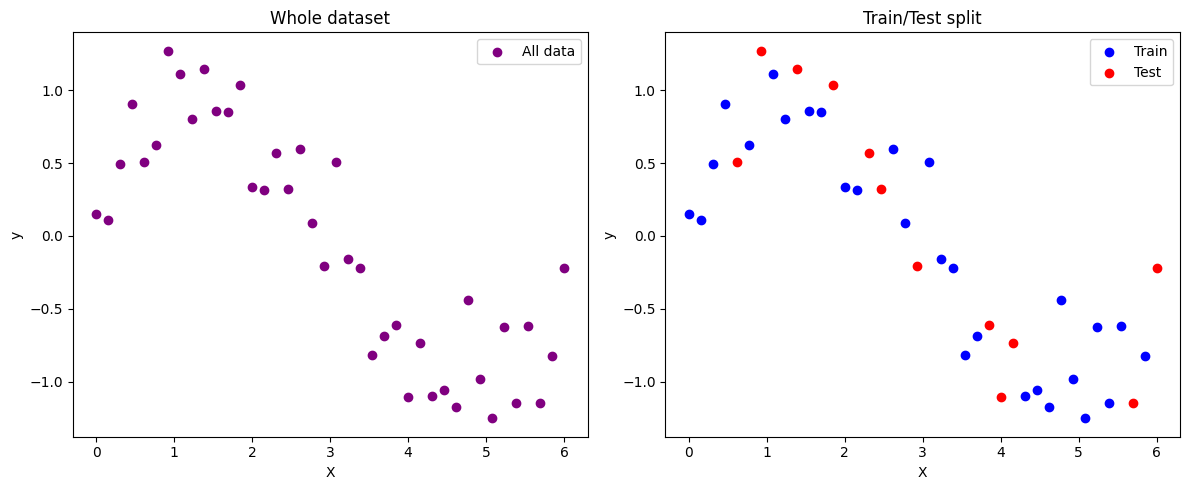

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Create noisy sine data
# Set the random seed for reproducibility
np.random.seed(42)
X = np.linspace(0, 6, 40).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.3, size=X.shape[0])

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Whole dataset
axes[0].scatter(X, y, color="purple", label="All data")
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].set_title("Whole dataset")
axes[0].legend()

# Train and test split
axes[1].scatter(X_train, y_train, color="blue", label="Train")
axes[1].scatter(X_test, y_test, color="red", label="Test")
axes[1].set_xlabel("X")
axes[1].set_ylabel("y")
axes[1].set_title("Train/Test split")
axes[1].legend()

plt.tight_layout()
plt.show()


Next, we train models with different polynomial degrees (linear, moderate, high-degree) and we measure their performance over training and test data.

Degree 1 model:
  y = 0.9131 - 0.344726·x

Degree 4 model:
  y = 0.0993 + 1.487519·x - 0.809312·x^2 + 0.108535·x^3 - 0.002990·x^4

Degree 15 model:
  y = 0.1159 - 1.143963·x + 14.998061·x^2 - 27.659247·x^3 + 9.396373·x^4 + 19.134925·x^5 - 13.690829·x^6 - 12.540197·x^7 + 22.880169·x^8 - 15.334131·x^9 + 5.970134·x^10 - 1.486768·x^11 + 0.241175·x^12 - 0.024752·x^13 + 0.001464·x^14 - 0.000038·x^15



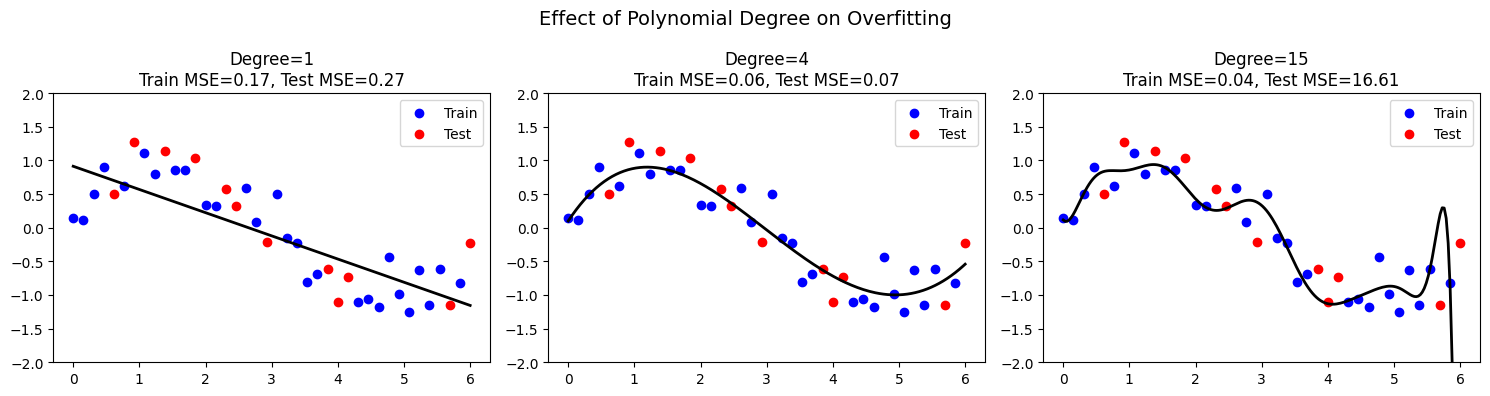

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create noisy sine data
# Set the random seed for reproducibility
np.random.seed(42)
X = np.linspace(0, 6, 40).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.3, size=X.shape[0])

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def print_equation(poly: PolynomialFeatures, model: LinearRegression, tol=1e-6):
    terms = [f"{model.intercept_:.4f}"]  # degree 0 (intercept)
    degrees = poly.powers_.ravel()
    for c, p in zip(model.coef_, degrees):
        if abs(c) < tol:
            continue
        if p == 1:
            term = "x"
        else:
            term = f"x^{p}"
        sign = "+" if c >= 0 else "-"
        terms.append(f"{sign} {abs(c):.6f}·{term}")
    print("  y = " + " ".join(terms))

# Try different polynomial degrees
degrees = [1, 4, 15]   # linear, moderate, high-degree (overfit)
plt.figure(figsize=(15, 4))

for i, d in enumerate(degrees, 1):
    # Create polynomial features
    #
    # Set up a transformer that expands each sample with all monomials up to degree d
    # With one feature x and `degree=4`, the columns become [1, x, x^2, x^3, x^4]
    poly = PolynomialFeatures(degree=d)
    # Apply the transformation above to X_train and X_test, so that now the two sets include the polynomial terms
    # This transformation maps the training data and returns the expanded training matrix
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)

    # Fit linear regression on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Print equation of the learnt regression model
    print(f"Degree {d} model:")
    print_equation(poly, model)
    print()

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred  = model.predict(X_test_poly)

    # Errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse  = mean_squared_error(y_test, y_test_pred)

    # Plot results
    plt.subplot(1, len(degrees), i)
    plt.scatter(X_train, y_train, label="Train", color="blue")
    plt.scatter(X_test, y_test, label="Test", color="red")

    # Smooth curve for plotting
    X_plot = np.linspace(0, 6, 200).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)
    plt.plot(X_plot, y_plot, color="black", linewidth=2)

    plt.title(f"Degree={d}\nTrain MSE={train_mse:.2f}, Test MSE={test_mse:.2f}")
    plt.ylim(-2, 2)
    plt.legend()

plt.suptitle("Effect of Polynomial Degree on Overfitting", fontsize=14)
plt.tight_layout()
plt.show()


What we observe:

* Degree 1 (linear):

    * High bias (underfits).

    * Both train and test MSE are relatively high.

* Degree 4 (moderate):

    * Good fit: low train error, also low test error.

    * Best generalisation.

* Degree 15 (high):

    * Extremely low train error (almost perfect).

    * Very high test error — the curve wiggles through training points but generalises poorly.

This example illustrates the **bias–variance tradeoff**:

* Low-degree leads to **underfitting** (high bias).

* Very high-degree leads to **overfitting** (high variance).

* Somewhere in the middle leads to **best generalisation**.

# 2. Model evaluation

## 2.1 Overfitting and underfitting

Overfitting and underfitting are two terms that we can use to diagnose a machine learning model based on the training and test set performance. I.e., a model that suffers from underfitting does not perform well on the test and training set. In contrast, a model that overfits (e.g., from fitting the noise in the training dataset) can usually be recognised by a high training set accuracy, but low test set accuracy.

* **Overfitting:** Overfitting occurs when a model learns the training data too well, to the extent that it starts memorising specific examples or noise in the data instead of learning general patterns. As a result, the model becomes overly complex and fails to generalise well to new data. Overfitting often leads to poor performance on unseen data, even though the model performs exceptionally well on the training data. Signs of overfitting include excessively low training error but high testing error or validation error.

* **Underfitting:** Underfitting, on the other hand, happens when a model fails to capture the underlying patterns in the training data. It occurs when the model is too simple or lacks the necessary complexity to represent the data adequately. Underfitting results in a model that performs poorly not only on the training data but also on new, unseen data. Signs of underfitting include high training error and similar high testing or validation error.

To find an optimal model, the goal is to strike a balance between overfitting and underfitting. Ideally, the model should be complex enough to capture the important patterns and relationships in the data, but not so complex that it memorises noise or idiosyncrasies of the training data. Intuitively, as a rule of thumb, the larger the *complexity* of the model (the hypothesis space a model has access to), the higher the risk of overfitting.



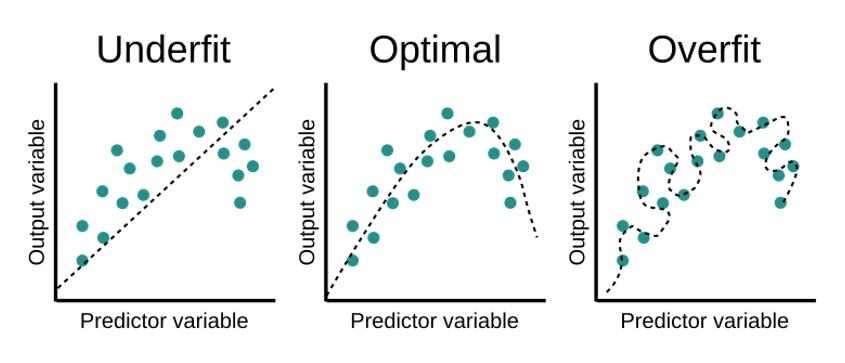

In [ ]:
from PIL import Image
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/4. Linear regression II/1_over_under.JPG')


## 2.2 Bias-Variance Trade-off

The bias-variance tradeoff is a fundamental concept in machine learning that deals with the relationship between the bias and variance of a model and their impact on the model's performance. It helps us understand the tradeoff between underfitting (high bias) and overfitting (high variance) in model performance.

* **Bias:** refers to the error introduced by approximating a real-world problem with a simplified model. A model with high bias tends to oversimplify the underlying relationships between features and the target variable. It makes strong assumptions about the data and typically leads to underfitting. In other words, a biased model has a limited ability to capture the complexity of the data.

* **Variance:** refers to the amount by which the model's predictions vary for different training datasets. A model with high variance is sensitive to the specific training data and captures noise or random fluctuations in the data. It tends to memorise the training examples and performs well on the training set, but may struggle to generalise to unseen data. In other words, a high-variance model overfits the training data.

To sum up:
- Bias is the difference between the average prediction of our model and the correct value which we are trying to predict.
    * A model with high bias pays very little attention to the training data and oversimplifies the model.
    * It always leads to high error on training and test data.
- Variance is the variability of model prediction for a given data point or a value, which tells us the spread of our data.
    * A model with high variance pays a lot of attention to training data and does not generalise to data which it has not seen before.
    * As a result, such models perform very well on training data but have high error rates on test data.


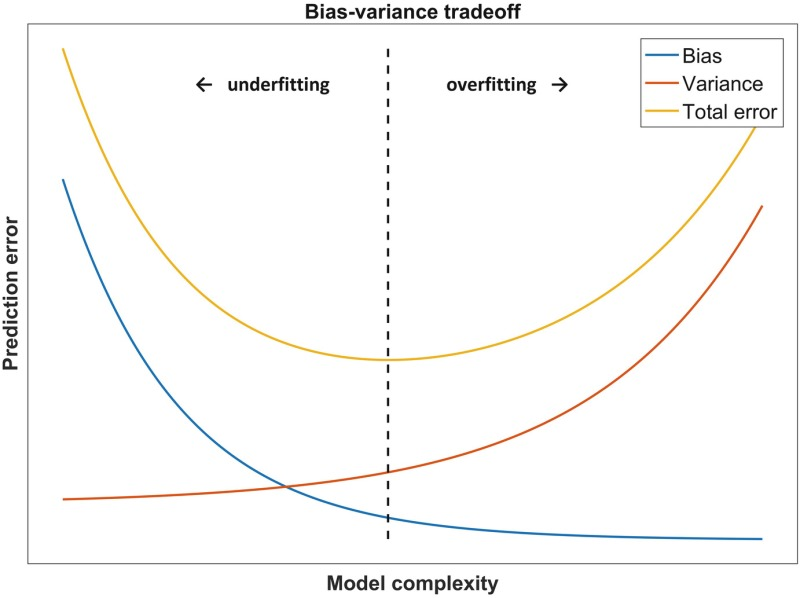

In [ ]:

Image.open('/content/drive/MyDrive/Class 25-26/3.Images/4. Linear regression II/2_tradeoff.jpg')

# 3. Improving generalisation: regularisation

When training a model (e.g. linear or logistic regression), we want it to fit the data **but not overfit**.
Overfitting happens when the model’s parameters fail to capture general patterns, namely, fail to generalise. In machine learning, <ins>regularisation refers to techniques that add extra constraints or penalties to a model’s training process to prevent overfitting and improve its ability to generalise to unseen data</ins>.

Regularisation combats overfitting **by augmenting the loss function to minimise during training with a penalty term on large weights**. The general **regularised loss** function becomes:

$$
\text{Loss (prediction error)} + \alpha \cdot \text{Penalty}
$$

where $\alpha$ (the **regularisation strength**) controls how much weight the penalty has.

## 3.1 Regularisation techniques

The penalty term can take the form of either the L1 or L2 norm of the weights, corresponding to the regularisation types known as **Lasso** and **Ridge**, respectively.

### 3.1.1 L1 (LASSO)

The Least Absolute Shrinkage and Selection Operator adds a penalty term proportional to the absolute values of the model's coefficients:

$$\text{Penalty}_{L1} = \|\boldsymbol{w}\|_1 = \sum_{j=1}^p |w_j|$$

where $p$ is the number of coefficients and $w_1,\ldots,w_p$ are the model's coefficients.

The L1 penalty encourages sparse solutions by driving some coefficients to zero, effectively performing **feature selection**. L1 regularisation can be useful when dealing with high-dimensional datasets where many features may be irrelevant.

* Lasso can result in sparse models with few coefficients, as some coefficients can become zero and be eliminated from the model.
* Larger penalties result in coefficient values closer to zero, which is ideal for producing simpler models.
* Lasso helps enhance the model's prediction accuracy and also helps improve the interpretability of the model through feature selection.

### 3.1.2 L2 (Ridge)

This technique adds a penalty term proportional to the squared magnitude of the model's coefficients:

$$\text{Penalty}_{L2} = \|\boldsymbol{w}\|_2^2 = \sum_{j=1}^p w_j^2.$$
where $p$ is the number of coefficients and $w_1,\ldots,w_p$ are the model's coefficients.

Unlike L1 regularisation, L2 regularisation does not force the coefficients to become exactly zero, but it shrinks their values towards zero. It can help to reduce the impact of irrelevant features and stabilise the model.

### 3.1.3 Generality, application and further generalisation techniques

**Generality.** While the names Ridge Regression and Lasso Regression originated in the context of linear regression, the idea of adding L1 or L2 penalties applies to a wide range of models in machine learning (e.g., logistic regression, SVMs, neural networks, etc.). Therefore, Ridge (L2) and Lasso (L1) are general-purpose regularisation techniques. Any model with parameters (linear or nonlinear) can incorporate these penalties in its loss function.

**Application.** Normalising (standardising/scaling) the features is essential if you plan to use L1 regularisation or L2 regularisation to ensure fair penalisation across features. Otherwise, the penalty term will unfairly shrink the coefficients of small-scale features more than large-scale ones.

**Further techniques.** There are other, useful regularisation techniques:
* Elastic Net (combination of L1 and L2 penalties).
* Dropout (randomly removes neurons in neural networks during training).
* Early stopping (stops training before the model starts overfitting).


## 3.2 Main benefits

* **Better generalisation** by reducing overfitting. By incorporating regularisation, one can prevent the model from excessively tailoring itself to the training data, thereby **reducing its variance**. Without regularisation, models can learn noise in the training data. Regularisation penalises overly complex models (large weights, unnecessary features). As a result, we obtain lower variance, better performance on unseen data. Although regularisation slightly increases the model's bias, it leads to much lower variance, and hence better test performance.

* **Helps with multicollinearity.** Multicollinearity occurs when there is a high correlation among predictor variables (features) in the dataset. Regularisation helps stabilise coefficients when predictors are correlated. In linear regression, when predictors are highly correlated, the estimated coefficients can become unstable (large variance, inflated magnitudes, signs flipping with small data changes). Ridge (L2) helps by shrinking correlated coefficients together, distributing weight more evenly. Lasso (L1) can help too, but it tends to pick one variable and drop the others.
Multicollinearity is classically discussed in linear regression, but the issue of unstable parameters when predictors are correlated also appears in logistic regression, linear classifiers, and other parametric models. Ridge/L2 helps beyond regression — it’s a general stabiliser in any model with linear weights.

* **Controls complexity and improves interpretability.** Models with many predictors and large, unstable coefficients are hard to interpret. We don’t know which features are truly driving predictions. Regularisation helps identify which predictors matter. L1 highlights the most important predictors: it sets many coefficients to exactly zero, leaving a small set of active features, hence producing a **sparse model**. L2 dampens noisy predictors so the model focuses on dominant ones. It keeps all coefficients, but shrinks them, making their relative importance easier to compare. In general, L2 is useful if you believe **all features matter, but not too much**. L1 is useful if you believe **only a subset of features are important**, and thus you need to perform **automatic feature selection**.


## 3.3 Regularisation for linear regression

For Linear regression, the loss function that yields the prediction error is MSE. Then, the goal of linear regression with L1 penalty is to minimise:

$$\text{Loss}_{\text{Lasso}} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2  + \alpha \sum_{j=1}^p |w_j| $$

And the goal of linear regression with L2 penalty is to minimise:

$$\text{Loss}_{\text{Ridge}} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
+ \alpha \sum_{j=1}^p w_j^2$$

In both cases, $n$ is the number of training samples, $p$ is the number of features, and $w_1,\ldots,w_p$ are the model's coefficients.

Notice that, in general, linear regression itself does not require scaling to make predictions correct. For instance, for plain OLS, scaling is not strictly required for correctness, but it helps with numerical stability and interpretability of coefficients (without scaling, a feature measured in meters vs millimetres will give coefficients that look very different in magnitude — but the difference is just due to units, not importance).

However, normalising data is **essential** if you plan to use L1 regularisation or L2 regularisation to ensure fair penalisation across features.


### Example

In the following example, we will do regularisation for linear regression. Our purpose is to show the benefits of regularisation to mend overfitting. For that, we will try to fix the overfitting that we experienced above when using a polynomial of degree 15.


==== Degree-15: OLS vs Ridge vs Lasso (fixed alphas) ====
       Train MSE  Test MSE  alpha
Model                            
OLS       0.0359    4.7474    NaN
Ridge     0.1084    0.1528   1.00
Lasso     0.1109    0.1491   0.01

Lasso kept 3/15 polynomial features.

Ridge kept 15/15 polynomial features.


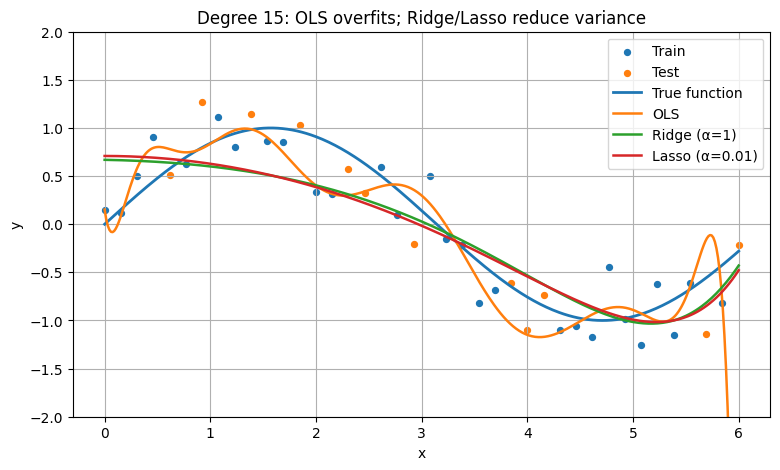

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  Degree-15 polynomial features
DEG = 15
poly = PolynomialFeatures(DEG, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

# Scale features explicitly
scaler = StandardScaler()
X_train_poly_s = scaler.fit_transform(X_train_poly)
X_test_poly_s  = scaler.transform(X_test_poly)

# Also prepare a smooth grid for plotting
X_plot = np.linspace(0, 6, 400).reshape(-1, 1)
X_plot_poly_s = scaler.transform(poly.transform(X_plot))

#  Fit models
ols = LinearRegression().fit(X_train_poly_s, y_train)

# Fixed alphas (set to reasonable defaults; tweak as needed)
RIDGE_ALPHA = 1.0
LASSO_ALPHA = 0.01

ridge = Ridge(alpha=RIDGE_ALPHA).fit(X_train_poly_s, y_train)
lasso = Lasso(alpha=LASSO_ALPHA, max_iter=50000, random_state=42).fit(X_train_poly_s, y_train)

#  Evaluate
rows = []
models = [
    ("OLS",   ols,   None),
    ("Ridge", ridge, RIDGE_ALPHA),
    ("Lasso", lasso, LASSO_ALPHA),
]
for name, model, alpha in models:
    ytr = model.predict(X_train_poly_s)
    yte = model.predict(X_test_poly_s)
    rows.append({
        "Model": name,
        "Train MSE": mean_squared_error(y_train, ytr),
        "Test MSE":  mean_squared_error(y_test,  yte),
        "alpha": alpha
    })

print("\n==== Degree-15: OLS vs Ridge vs Lasso (fixed alphas) ====")
print(pd.DataFrame(rows).set_index("Model").round(4))

# show Lasso and Ridge sparsity
coef = lasso.coef_
print(f"\nLasso kept {np.count_nonzero(coef)}/{coef.size} polynomial features.")
coef = ridge.coef_
print(f"\nRidge kept {np.count_nonzero(coef)}/{coef.size} polynomial features.")

#  Plots
plt.figure(figsize=(9, 5))
plt.scatter(X_train, y_train, s=18, label="Train")
plt.scatter(X_test,  y_test,  s=18, label="Test")
plt.plot(X_plot, np.sin(X_plot), linewidth=2, label="True function")

plt.plot(X_plot, ols.predict(X_plot_poly_s),   linewidth=1.8, label="OLS")
plt.plot(X_plot, ridge.predict(X_plot_poly_s), linewidth=1.8, label=f"Ridge (α={RIDGE_ALPHA:.3g})")
plt.plot(X_plot, lasso.predict(X_plot_poly_s), linewidth=1.8, label=f"Lasso (α={LASSO_ALPHA:.3g})")

plt.title("Degree 15: OLS overfits; Ridge/Lasso reduce variance")
plt.xlabel("x"); plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.ylim(-2, 2)
plt.show()


We observe that OLS clearly overfits (low train MSE, high test MSE). Lasso and Ridge manage to fix that. Moreover, notice that Lasso zeros  12 out 15 coefficients. Let's compare the coefficients for each model.

In [ ]:
#  Print standardised & original (unscaled) coefficients for each model
feature_labels = poly.get_feature_names_out(["x"])  # ['x', 'x^2', ..., 'x^15']

def print_coeffs_std_and_orig(model, name, scaler, feature_labels, round_to=12):
    # Coefs/intercept in standardized space (after StandardScaler)
    w_std = model.coef_.astype(float)
    b_std = float(getattr(model, "intercept_", 0.0))

    # Back-transform to original (unscaled) polynomial features:
    # z_j = (x_j - mean_j)/scale_j  =>  y = b_std + Σ w_std_j * z_j
    # => y = (b_std - Σ w_std_j*mean_j/scale_j) + Σ (w_std_j/scale_j)*x_j
    scale = scaler.scale_.astype(float)
    mean  = scaler.mean_.astype(float)

    w_orig = w_std / scale
    b_orig = b_std - np.sum(w_std * mean / scale)

    # Print
    print(f"\n=== {name} coefficients ===")
    print(f"{name} intercept (standardized): {b_std:.{round_to}f}")
    print(f"{name} intercept (original)   : {b_orig:.{round_to}f}")

    df = pd.DataFrame({
        "feature": feature_labels,
        f"{name} coef (standardized)": np.round(w_std, round_to),
        f"{name} coef (original)":     np.round(w_orig, round_to),
    })
    print(df.to_string(index=False))

# Call for each model
print_coeffs_std_and_orig(ols,   "OLS",   scaler, feature_labels)
print_coeffs_std_and_orig(ridge, "Ridge", scaler, feature_labels)
print_coeffs_std_and_orig(lasso, "Lasso", scaler, feature_labels)


=== OLS coefficients ===
OLS intercept (standardized): -0.119156426631
OLS intercept (original)   : 0.152457455816
feature  OLS coef (standardized)  OLS coef (original)
      x            -1.391155e+01            -7.668807
    x^2             8.398486e+02            77.501508
    x^3            -1.557565e+04          -257.135535
    x^4             1.497002e+05           446.399518
    x^5            -8.767895e+05          -471.601211
    x^6             3.415296e+06           329.874052
    x^7            -9.397584e+06          -162.139077
    x^8             1.915993e+07            58.741518
    x^9            -3.007440e+07           -16.305115
   x^10             3.717713e+07             3.548916
   x^11            -3.604194e+07            -0.603486
   x^12             2.637734e+07             0.077213
   x^13            -1.352722e+07            -0.006903
   x^14             4.271841e+06             0.000379
   x^15            -6.185489e+05            -0.000010

=== Ridge coefficie

OLS coefficients are very inflated. Lasso zeros most coefficients, and Ridge brings the values of all coefficients down.

### 3.3.1 Impact of the regularisation strength (alpha)




==== Lasso across alphas ====
       Train MSE  Test MSE  Nonzero Coefs
alpha                                    
0.001    0.06274   0.12903              4
0.010    0.11085   0.14908              3
0.100    0.16437   0.32264              2


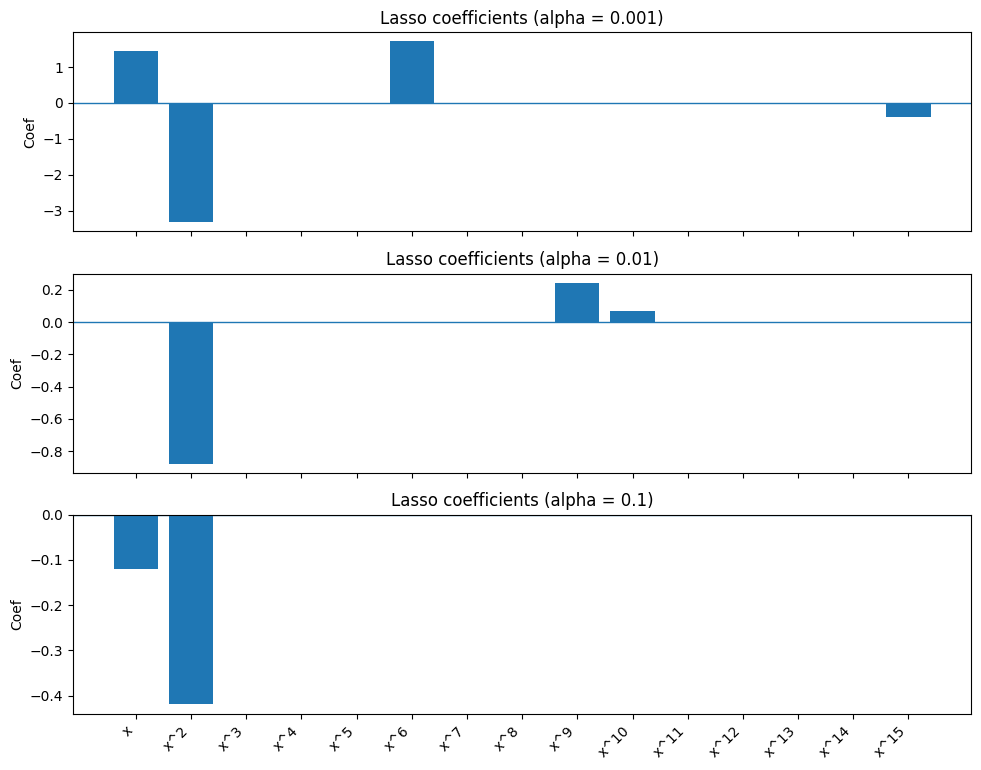

In [ ]:
#  Lasso sweep over three alphas
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alphas = [1e-3, 1e-2, 1e-1]  # tweak if everything is all-zero or none-zero
results = []
coef_list = []

for a in alphas:
    la = Lasso(alpha=a, max_iter=100000, random_state=42)
    la.fit(X_train_poly_s, y_train)
    ytr = la.predict(X_train_poly_s)
    yte = la.predict(X_test_poly_s)
    results.append({
        "alpha": a,
        "Train MSE": mean_squared_error(y_train, ytr),
        "Test MSE":  mean_squared_error(y_test,  yte),
        "Nonzero Coefs": int(np.count_nonzero(la.coef_)),
    })
    coef_list.append(la.coef_)

# Show table
df = pd.DataFrame(results).set_index("alpha").round(5)
print("\n==== Lasso across alphas ====")
print(df)

#  Coefficient bar plots for each alpha
# Feature names for readability (standardised poly features)
try:
    feat_names = poly.get_feature_names_out(["x"])
except Exception:
    feat_names = poly.get_feature_names_out()

n_alphas = len(alphas)
fig, axes = plt.subplots(n_alphas, 1, figsize=(10, 2.6*n_alphas), sharex=True)

if n_alphas == 1:
    axes = [axes]  # ensure iterable

xpos = np.arange(len(coef_list[0]))
for i, (a, coef) in enumerate(zip(alphas, coef_list)):
    ax = axes[i]
    ax.bar(xpos, coef)
    ax.axhline(0, linewidth=1)
    ax.set_ylabel("Coef")
    ax.set_title(f"Lasso coefficients (alpha = {a:g})")

axes[-1].set_xticks(xpos)
axes[-1].set_xticklabels(feat_names, rotation=45, ha="right")
fig.tight_layout()
plt.show()

As the regularisation strenght increases, the more coefficients are zeroed and their values lower.


==== Ridge across alphas ====
        Train MSE  Test MSE  Nonzero Coefs
alpha                                     
0.001     0.06088   0.11097             15
0.100     0.07274   0.15828             15
10.000    0.13870   0.21868             15


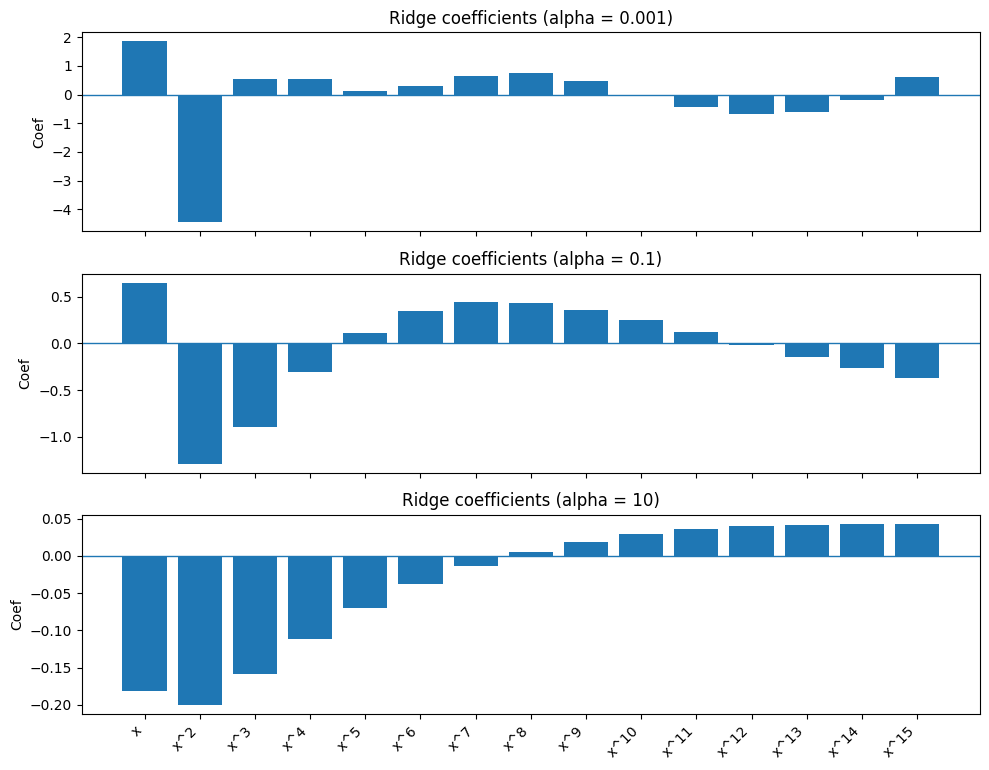

In [ ]:
#  Ridge sweep over three alphas
alphas_ridge = [1e-3, 1e-1, 10.0]  # adjust if needed
results_ridge = []
ridge_coefs = []

for a in alphas_ridge:
    rg = Ridge(alpha=a)
    rg.fit(X_train_poly_s, y_train)
    ytr = rg.predict(X_train_poly_s)
    yte = rg.predict(X_test_poly_s)
    results_ridge.append({
        "alpha": a,
        "Train MSE": mean_squared_error(y_train, ytr),
        "Test MSE":  mean_squared_error(y_test,  yte),
        "Nonzero Coefs": int(np.count_nonzero(rg.coef_)),
    })
    ridge_coefs.append(rg.coef_)

# Show table
df_ridge = pd.DataFrame(results_ridge).set_index("alpha").round(5)
print("\n==== Ridge across alphas ====")
print(df_ridge)

# Coefficient bar plots for each alpha
# Feature names for readability (standardised poly features)
try:
    feat_names = poly.get_feature_names_out(["x"])
except Exception:
    feat_names = poly.get_feature_names_out()

n = len(alphas_ridge)
fig, axes = plt.subplots(n, 1, figsize=(10, 2.6*n), sharex=True)
if n == 1:
    axes = [axes]  # ensure iterable

xpos = np.arange(ridge_coefs[0].size)
for ax, a, coef in zip(axes, alphas_ridge, ridge_coefs):
    ax.bar(xpos, coef)
    ax.axhline(0, linewidth=1)
    ax.set_ylabel("Coef")
    ax.set_title(f"Ridge coefficients (alpha = {a:g})")

axes[-1].set_xticks(xpos)
axes[-1].set_xticklabels(feat_names, rotation=45, ha="right")
fig.tight_layout()
plt.show()


What do you observe in these results as the regularisation strength (alpha) increases?

**Solution:**

### 3.3.2 How to find the optimal regularisation strength($\alpha$)

Finding the optimal alpha allows you to balance the model complexity, reduce overfitting, improve generalisation performance, and potentially identify important features.

==== Degree-15: Grid search over alpha ====
               alpha  Train MSE  Test MSE
Model                                    
Ridge (best)  0.0001   0.058578  0.088150
Lasso (best)  0.0001   0.061075  0.116876

Lasso kept 9/15 polynomial features (alpha=0.0001).


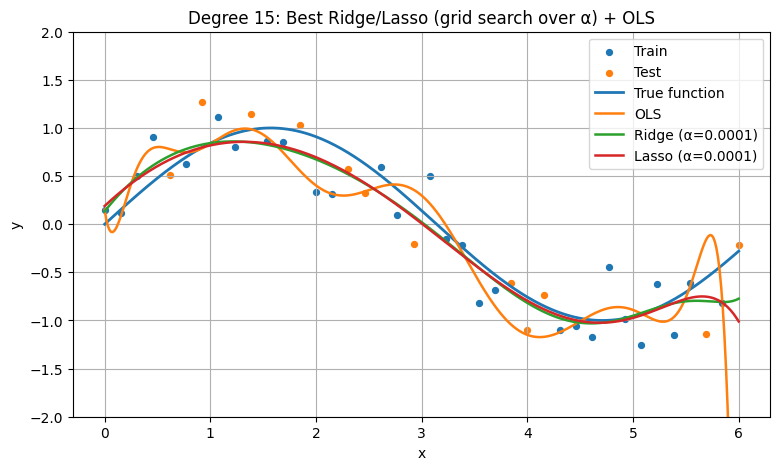

In [ ]:
# Grid search for Ridge/Lasso
ALPHAS = np.logspace(-4, 3, 60)

def eval_model(model, Xtr, ytr, Xte, yte):
    ytr_pred = model.predict(Xtr)
    yte_pred = model.predict(Xte)
    return mean_squared_error(ytr, ytr_pred), mean_squared_error(yte, yte_pred)

# OLS baseline
ols = LinearRegression().fit(X_train_poly_s, y_train)

best = {
    "ridge": {"alpha": None, "train_mse": np.inf, "test_mse": np.inf, "model": None},
    "lasso": {"alpha": None, "train_mse": np.inf, "test_mse": np.inf, "model": None},
}

for a in ALPHAS:
    # Ridge
    r = Ridge(alpha=a).fit(X_train_poly_s, y_train)
    tr_mse, te_mse = eval_model(r, X_train_poly_s, y_train, X_test_poly_s, y_test)
    if te_mse < best["ridge"]["test_mse"]:
        best["ridge"].update({"alpha": a, "train_mse": tr_mse, "test_mse": te_mse, "model": r})

    # Lasso
    l = Lasso(alpha=a, max_iter=200000, random_state=42).fit(X_train_poly_s, y_train)
    tr_mse, te_mse = eval_model(l, X_train_poly_s, y_train, X_test_poly_s, y_test)
    if te_mse < best["lasso"]["test_mse"]:
        best["lasso"].update({"alpha": a, "train_mse": tr_mse, "test_mse": te_mse, "model": l})

#  Report best alphas (Ridge/Lasso)
print("Degree-15: Grid search over alpha")
summary = pd.DataFrame({
    "Model": ["Ridge (best)", "Lasso (best)"],
    "alpha": [best["ridge"]["alpha"], best["lasso"]["alpha"]],
    "Train MSE": [best["ridge"]["train_mse"], best["lasso"]["train_mse"]],
    "Test MSE":  [best["ridge"]["test_mse"],  best["lasso"]["test_mse"]],
}).set_index("Model").round(6)
print(summary)

# Lasso sparsity at best alpha
coef = best["lasso"]["model"].coef_
print(f"\nLasso kept {np.count_nonzero(coef)}/{coef.size} polynomial features (alpha={best['lasso']['alpha']:.5g}).")

#  Plot with best Ridge/Lasso + OLS
plt.figure(figsize=(9, 5))
plt.scatter(X_train, y_train, s=18, label="Train")
plt.scatter(X_test,  y_test,  s=18, label="Test")
plt.plot(X_plot, np.sin(X_plot), linewidth=2, label="True function")

ridge_best = best["ridge"]["model"]
lasso_best = best["lasso"]["model"]

plt.plot(X_plot, ols.predict(X_plot_poly_s),   linewidth=1.8, label="OLS")  # ← added
plt.plot(X_plot, ridge_best.predict(X_plot_poly_s), linewidth=1.8,
         label=f"Ridge (α={best['ridge']['alpha']:.3g})")
plt.plot(X_plot, lasso_best.predict(X_plot_poly_s), linewidth=1.8,
         label=f"Lasso (α={best['lasso']['alpha']:.3g})")

plt.title("Degree 15: Best Ridge/Lasso (grid search over α) + OLS")
plt.xlabel("x"); plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.ylim(-2, 2)
plt.show()

### Note: Automating the search for the optimal alpha (model).

In practice, you will not have to write a loop that searches for the optimal $\alpha$, and hence optimal model. Sklearn provides RidgeCV and LassoCV. RidgeCV is Ridge regression with **built-in hyperparameter tuning for α (the L2 penalty)**. It tries a set of candidate alphas, uses **cross-validation** to score each one (evaluate each model), chooses the best $\alpha$, and then refits Ridge on all the training data with that $\alpha$. LassoCV operates analogously with an L1 penalty.

In both cases, the best model (with optimal $\alpha$) is selected by **cross-validation**, which we will study in the next lecture.

## 3.4 Regularisation for logistic regression

Logistic regression models typically use L2 regularisation (by default in scikit-learn). L2 regularisation is generally preferred for logistic regression because of its mathematical stability, optimisation properties, and predictive performance. Overall:

* L2 is preferred when you want **stability, smooth optimisation, and good predictive accuracy**.
* L1 is useful when you want **automatic feature selection** or sparsity.

Next, we will train three classifiers for the breast cancer dataset. The first one will disregard penalties (regularisation), while the other two will employ L1 and L2 penalties. Our goal is to compare the three classifiers in terms of accuracy, loss, and coefficients.

The **Breast Cancer Wisconsin dataset** is a classic benchmark dataset for binary classification. It contains 569 samples, each one with 30 real-valued features, all computed from digitised images of fine needle aspirates of breast masses. The target classes are:

* 0 = malignant (cancerous)

* 1 = benign (non-cancerous)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# import the dataset from sklearn
breast_cancer = load_breast_cancer()

# create a variable "data" which contains the dataframe from the dataset
data = pd.DataFrame(data=breast_cancer['data'], columns=breast_cancer['feature_names'])
data['target'] = pd.Series(breast_cancer['target'], dtype='category')

# Sample 10 cases (5 from each class)
sample_0 = data[data['target'] == 0].sample(5, random_state=42)
sample_1 = data[data['target'] == 1].sample(5, random_state=42)
sampled_cases = pd.concat([sample_0, sample_1])

print("10 sampled cases (5 with target=0 and 5 with target=1):")
print(sampled_cases)


10 sampled cases (5 with target=0 and 5 with target=1):
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
33        19.270         26.47          127.90     1162.0          0.09401   
400       17.910         21.02          124.40      994.0          0.12300   
274       17.930         24.48          115.20      998.9          0.08855   
129       19.790         25.12          130.40     1192.0          0.10150   
87        19.020         24.59          122.00     1076.0          0.09029   
395       14.060         17.18           89.75      609.1          0.08045   
110        9.777         16.99           62.50      290.2          0.10370   
481       13.900         19.24           88.73      602.9          0.07991   
493       12.460         12.83           78.83      477.3          0.07372   
136       11.710         16.67           74.72      423.6          0.10510   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
33      

First, we will train a binary classifier with no regularisation.

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

# Split data into training and testing
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale training and test sets
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)   # fit on train
X_test_std  = sc.transform(X_test)        # transform test

# np.set_printoptions(precision=3, suppress=True)
# print(X_train_std[:5])

# Train model with NO regularisation
clf = LogisticRegression(
    penalty=None, solver='lbfgs', max_iter=2000, random_state=42
)
clf.fit(X_train_std, y_train)

# Accuracy
print('Training accuracy:', clf.score(X_train_std, y_train))
print('Test accuracy    :', clf.score(X_test_std, y_test))

# Test log loss
p_test = clf.predict_proba(X_test_std)[:, 1]   # predicted probabilities for class 1
test_ll = log_loss(y_test, p_test)
print(f"Test log loss    : {test_ll:.4f}")

# Coefficients
print(f"L2 norm ||w||2   : {np.linalg.norm(clf.coef_):.4f}")

np.set_printoptions(8)
print('Coefficients:', clf.coef_)
print('Number of features:', clf.coef_.shape)
print('Number of non-zero coefficients:', clf.coef_[clf.coef_ != 0].shape)


Training accuracy: 1.0
Test accuracy    : 0.9649122807017544
Test log loss    : 1.1073
L2 norm ||w||2   : 507.5170
Coefficients: [[  37.35957493   14.85518911   37.56728149    9.89071914   -6.14594318
   240.83451916  -74.57763999  -72.0469859     4.4097567  -141.74801909
  -140.07449895   49.51727113   57.39484005 -184.33347017   -4.02796875
   -76.98414152  133.60091408  -56.44784645   78.42290188   30.06943699
   -68.21192775 -114.50395134  -20.76843418 -114.59939279   -1.15219966
    30.89360294 -144.3055659  -101.99596519  -74.4633826    55.7644531 ]]
Number of features: (1, 30)
Number of non-zero coefficients: (30,)


In [ ]:
# L1 regularisation

# Train model with L1 penalty
clf = LogisticRegression(
    penalty='l1', C=1.0, solver='liblinear', max_iter=2000, random_state=42
)
clf.fit(X_train_std, y_train)

# Accuracy
print('Training accuracy:', clf.score(X_train_std, y_train))
print('Test accuracy    :', clf.score(X_test_std, y_test))

# Test log loss
p_test = clf.predict_proba(X_test_std)[:, 1]   # predicted probabilities for class 1
test_ll = log_loss(y_test, p_test)
print(f"Test log loss    : {test_ll:.4f}")

# Coefficients
print(f"L2 norm ||w||2   : {np.linalg.norm(clf.coef_):.4f}")

np.set_printoptions(8)
print('Coefficients:', clf.coef_)
print('Number of features:', clf.coef_.shape)
print('Number of non-zero coefficients:', clf.coef_[clf.coef_ != 0].shape)


Training accuracy: 0.9874371859296482
Test accuracy    : 0.9766081871345029
Test log loss    : 0.0850
L2 norm ||w||2   : 4.5228
Coefficients: [[ 0.         -0.10853394  0.          0.          0.          0.
   0.         -0.19508615  0.          0.         -0.1080418   0.18153699
   0.         -1.73742742 -0.15424626  0.43529178  0.          0.
   0.          0.         -1.78679744 -1.34210411  0.         -2.85325433
  -0.76231509  0.         -0.32751164 -1.71506192 -0.60398154  0.        ]]
Number of features: (1, 30)
Number of non-zero coefficients: (14,)


Notice that the classifier using the L1 penalty brings down to zero more than 50% of the coefficients! Therefore, the L1 penalty helps the classifier do **automatic feature selection**, namely, to select the most important features. At the same time, notice that, with respect to the unregularised classifier, test accuracy is better and test log loss is lower, and the coefficient's norm with L2 is smaller. Therefore, we obtain less overfitting and smoother weights.

In [ ]:
# L2 regularisation

# Train model with L2 penalty
clf = LogisticRegression(
    penalty='l2', C=1.0, solver='liblinear', max_iter=2000, random_state=42
)
clf.fit(X_train_std, y_train)

# Accuracy
print('Training accuracy:', clf.score(X_train_std, y_train))
print('Test accuracy    :', clf.score(X_test_std, y_test))

# Test log loss
p_test = clf.predict_proba(X_test_std)[:, 1]   # predicted probabilities for class 1
test_ll = log_loss(y_test, p_test)
print(f"Test log loss    : {test_ll:.4f}")

# Coefficients
print(f"L2 norm ||w||2   : {np.linalg.norm(clf.coef_):.4f}")

np.set_printoptions(8)
print('Coefficients:', clf.coef_)
print('Number of features:', clf.coef_.shape)
print('Number of non-zero coefficients:', clf.coef_[clf.coef_ != 0].shape)


Training accuracy: 0.9874371859296482
Test accuracy    : 0.9883040935672515
Test log loss    : 0.0655
L2 norm ||w||2   : 3.3871
Coefficients: [[-0.48431991 -0.46467509 -0.4503601  -0.55685253 -0.15972054  0.65734006
  -0.54263986 -0.6288608  -0.11581996  0.02977112 -0.88835779  0.36116556
  -0.2111288  -0.95481577 -0.18663722  0.57519908  0.16879018 -0.25735014
   0.31928871  0.34294713 -0.93863448 -1.21290675 -0.73206367 -0.97569074
  -0.7585647   0.02832094 -0.79133303 -0.99061511 -0.86116755 -0.1606306 ]]
Number of features: (1, 30)
Number of non-zero coefficients: (30,)


We observe that following with respec to the unregularised classifier:

* Train accuracy/log loss better for the unregularized model (it overfits).

* Test accuracy/log loss better for the L2 model.

* The L2 norm of coefficients (||w||₂) are noticeably smaller with L2 (smoother weights, less variance).

These are general observations about the benefits of using L2.

### 3.4.1 Impact of the regularisation strength ($\alpha$)

In the examples above, we have set the regularisation strength to $1.0$. In the examples that follow, we show how the regularisation strength affects a classifier's accuracy and coefficients.

In [ ]:
def plot_regularization(df, reg_type='l1'):
    # Split (stratified) and scale (fit on train, transform test)
    X = df.drop('target', axis=1)
    y = df['target'].astype(int)  # ensure 0/1
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std  = scaler.transform(X_test)

    # Grid of C (inverse of regularisation strength)
    Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    coefs = []
    train_scores = []
    test_scores = []
    test_logloss = []

    for C in Cs:
        clf = LogisticRegression(
            penalty=reg_type, C=C, solver='liblinear', max_iter=2000, random_state=42
        )
        clf.fit(X_train_std, y_train)

        # Store performance
        coefs.append(clf.coef_.ravel())
        train_scores.append(clf.score(X_train_std, y_train))
        test_scores.append(clf.score(X_test_std, y_test))

        p_test = clf.predict_proba(X_test_std)[:, 1]
        test_logloss.append(log_loss(y_test, p_test))

    reg = reg_type.upper()

    # Plots in two rows: (a) Accuracy, (b) Test Log Loss, (c) Coefficient paths
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    ax1, ax2, ax3 = axes[0,0], axes[0,1], axes[1,0]
    fig.delaxes(axes[1,1])  # remove empty subplot

    # (a) Accuracy
    ax1.plot(Cs, train_scores, 'o-', label='Train')
    ax1.plot(Cs, test_scores,  'o-', label='Test')
    ax1.set_xscale('log')
    ax1.set_xlabel(r'C = 1/$\alpha$ (inverse regularization strength)')
    ax1.set_ylabel('Accuracy')
    ax1.set_title(f'{reg} regularization — Accuracy')
    ax1.legend()

    # (b) Test log loss
    ax2.plot(Cs, test_logloss, 'o-')
    ax2.set_xscale('log')
    ax2.set_xlabel(r'C = 1/$\alpha$ (inverse regularization strength)')
    ax2.set_ylabel('Test log loss (lower is better)')
    ax2.set_title(f'{reg} regularization — Test Log Loss')

    # (c) Coefficient paths (larger subplot)
    coefs = np.array(coefs)  # shape: [len(Cs), n_features]
    n_params = coefs.shape[1]
    for i in range(n_params):
        ax3.plot(Cs, coefs[:, i], label=X.columns[i])
    ax3.axhline(y=0, linestyle='--', color='black', linewidth=1)
    ax3.set_xscale('log')
    ax3.set_xlabel(r'C = 1/$\alpha$ (inverse regularization strength)')
    ax3.set_ylabel('Coefficient value')
    ax3.set_title(f'{reg} regularization — Coefficients')

    # Optional: keep legend only if not too many features
    if n_params <= 12:
        ax3.legend(ncol=2, fontsize=8)

    plt.tight_layout()
    plt.show()


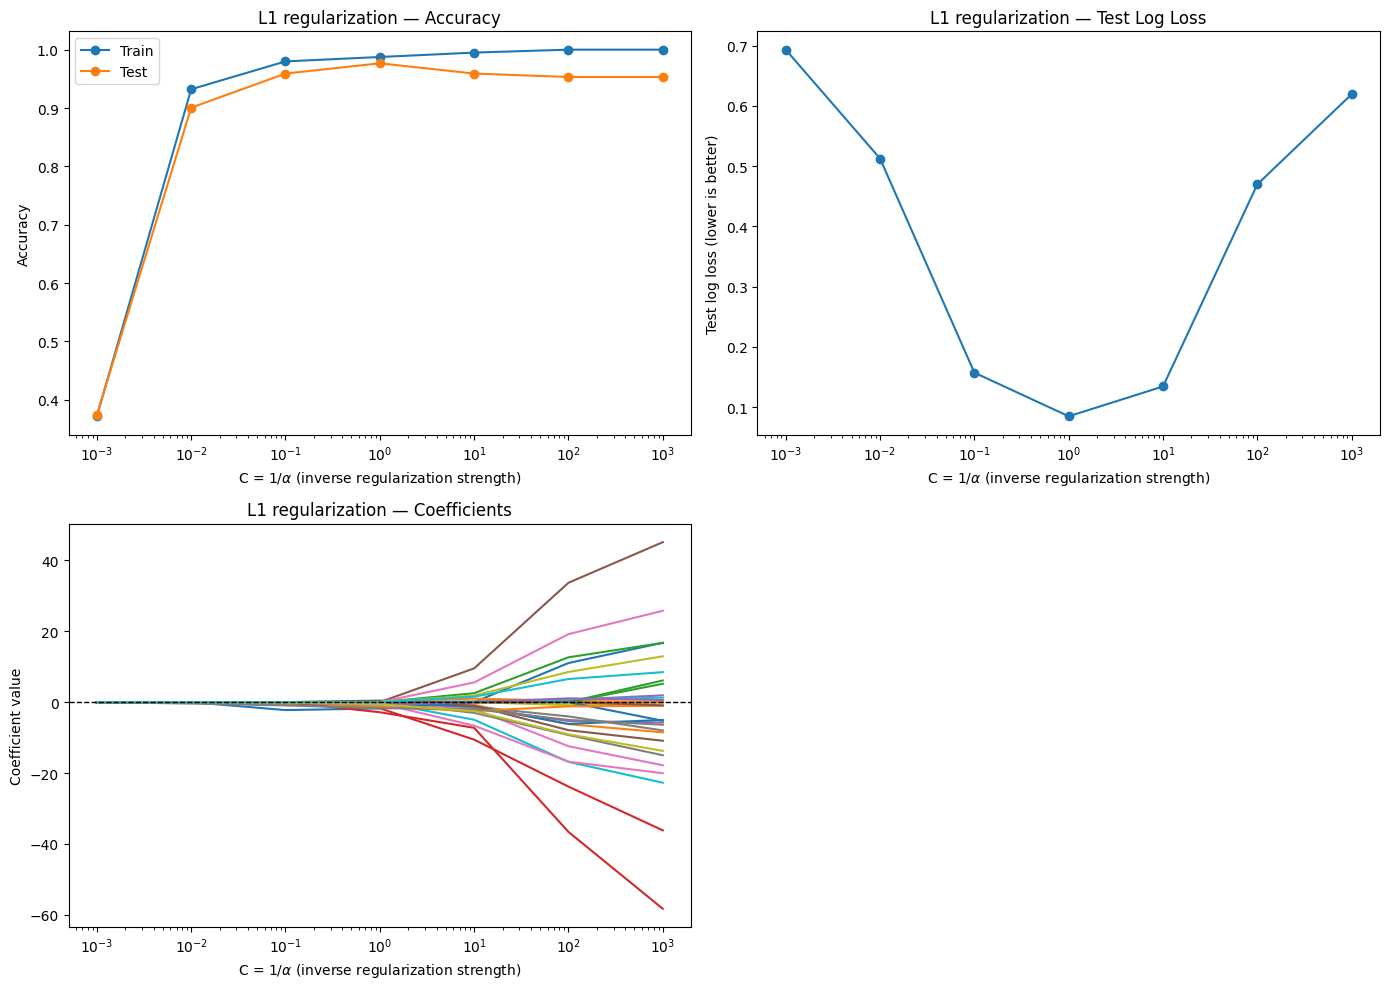

In [ ]:
plot_regularization(data, 'l1')

We see how the L1 regularisation flattens the model coefficients close to zero for many levels of the regularisation strength (1/C). The coefficients with the highest values are, according to the model, the most important features for the prediction.

We also see the onset of overfitting at C=1: the performance of the training set increases while that in the test set decreases.

We now apply the same function to evaluate the effects of L2.

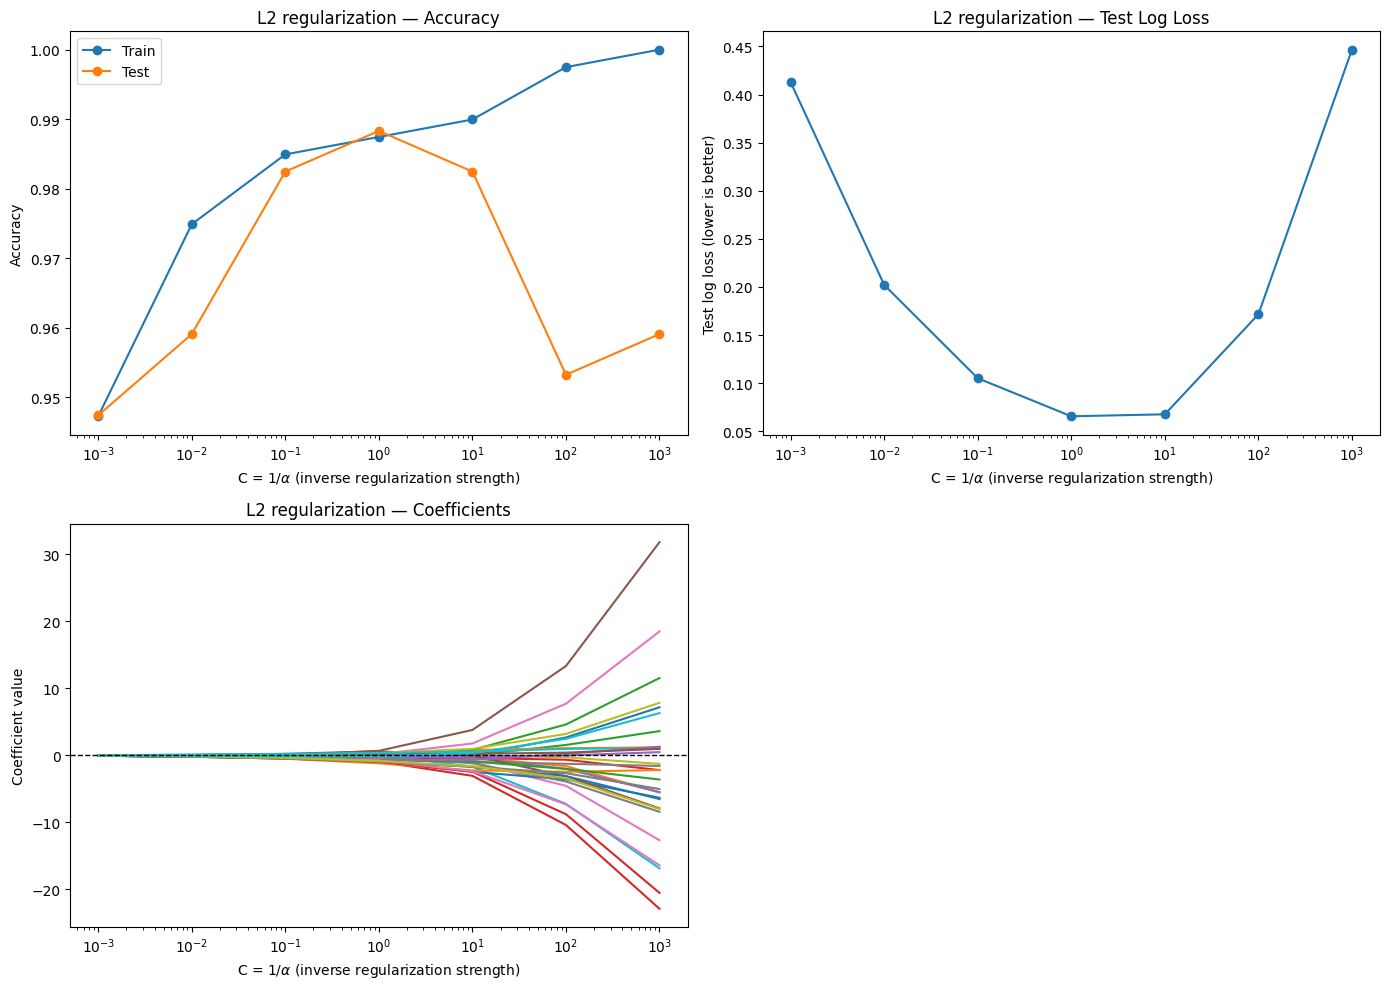

In [ ]:
plot_regularization(data, 'l2')

Again, we also see the onset of overfitting at C=1: the performance of the training set increases while that in the test set decreases.

However, the coefficients are always above zero, thus creating a distribution of gradually increasing weights for the most relevant features.

## 3.4 Regularisation. Summary

| Model                | L2 (Ridge)                                                                 | L1 (Lasso)                                                                 | Effect |
|-----------------------|-----------------------------------------------------------------------------|-----------------------------------------------------------------------------|--------|
| **Linear Regression** | $\displaystyle \min_{w} \; \frac{1}{n}\sum_{i=1}^n (y_i - w^\top x_i)^2 + \alpha \|w\|_2^2$ | $\displaystyle \min_{w} \; \frac{1}{n}\sum_{i=1}^n (y_i - w^\top x_i)^2 + \alpha \|w\|_1$ | L2 shrinks all coefficients smoothly (none exactly zero). L1 drives some coefficients to zero (feature selection). |
| **Logistic Regression** | $\displaystyle \min_{w} \; -\frac{1}{n}\sum_{i=1}^n \Big[ y_i \log p_i + (1-y_i)\log(1-p_i)\Big] + \alpha \|w\|_2^2$ | $\displaystyle \min_{w} \; -\frac{1}{n}\sum_{i=1}^n \Big[ y_i \log p_i + (1-y_i)\log(1-p_i)\Big] + \alpha \|w\|_1$ | Same effect: L2 shrinks all coefficients, L1 enforces sparsity by zeroing out some coefficients. |


# Class exercise

In this lecture, we have coded a binary classifier for the Breast Cancer Wisconsin dataset. We have also seen that L1 regularisation and L2 regularisation reduce the variance (reduce the test log loss) of an (unregularised) linear regression classifier.
Through this exercise, you will analyse the improvements achieved by L1 regularisation and L2 regularisation when classifying the samples in the test set. For each classifier:

* Count the number of predictions made by the classifier for the samples in the test set, the number of malignant cases (label 0), and benign cases (label 1). Tip: Use the classifier to obtain the predictions over the test set.
* Compute the probability for each sample in the test set of being of class 1 (benign)
* Count the number of correct classifications and misclassifications over the test set
* For each misclassified sample in the test set, show the true label, the predicted label, and the probability of being of class 1 (benign)
* Compare the misclassifications of the linear regression classifier versus the regularised classifiers. What do you observe? Can you relate your observations to the values observed during the lecture for the test losses of the three classifiers?

# Solution



Now, we can use again L1 regularisation and L2 regularisation as we did in class. We can use the same code as above to compute misclassifications.